### **Import Libraries** 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Data Loading 

In [2]:
data=pd.read_csv(r'C:\Users\shher\OneDrive\Desktop\my python\googleplaystore.csv')

### **Data Understanding** 

In [3]:
data.shape

(10841, 13)

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Note
need [Reviews & Size & Installs & Price] to be integer

In [7]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Data Cleaning 

In [8]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

there are NAN values in Rating

In [9]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
data = data.drop([ "Current Ver"], axis=1)

i think current ver unneceessary col

In [11]:
#detect null cols and null rate
nulls = [i for i in data.isna().any().index if data.isna().any()[i]==True]
rates = []
counts = []
for i in nulls:    
    rates.append((data[i].isna().sum()/data.shape[0])*100)
    counts.append(data[i].isna().sum())
null_df = pd.DataFrame.from_dict({"Col":nulls,"Count":counts,"Null_Rates":rates})
null_df


,Col,Count,Null_Rates
0,Rating,1474,13.596532
1,Type,1,0.009224
2,Content Rating,1,0.009224
3,Android Ver,3,0.027673


In [12]:
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

C:\Users\shher\AppData\Local\Temp\ipykernel_26660\1155646611.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].mean(), inplace=True)


In [13]:
# Fill missing values in "Type" with the mode
data['Type'].fillna(data['Type'].mode()[0], inplace=True)

# Fill missing values in "Content Rating" with the mode
data['Content Rating'].fillna(data['Content Rating'].mode()[0], inplace=True)

C:\Users\shher\AppData\Local\Temp\ipykernel_26660\2543634657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Type'].fillna(data['Type'].mode()[0], inplace=True)
C:\Users\shher\AppData\Local\Temp\ipykernel_26660\2543634657.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [14]:
print(data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android Ver       3
dtype: int64


In [15]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#fix size
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))  
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  
    elif size == 'Varies with device':
        return None  
    else:
        return None  

data['Size'] = data['Size'].apply(convert_size)

In [17]:
# Fill missing values with the average size
data['Size'].fillna(data['Size'].mean(), inplace=True)

# Alternatively, we can drop rows with missing values
# data.dropna(subset=['Size'], inplace=True)

C:\Users\shher\AppData\Local\Temp\ipykernel_26660\3464280877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Size'].fillna(data['Size'].mean(), inplace=True)


In [ ]:
print(data['Size'].head())  # Display the first 5 values in the column
print(data['Size'].isnull().sum())  

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64
0


In [19]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [20]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [21]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        data[col]=data[col].str.replace(item,'')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [22]:
data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [23]:
data['Installs'] = data['Installs'].replace('Free', '0')

In [24]:
data['Price'].unique()


array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [25]:
data['Price'] = data['Price'].replace('Everyone', '0')

In [26]:
# Convert columns to numbers
data['Installs'] = pd.to_numeric(data['Installs'])
data['Price'] = pd.to_numeric(data['Price'])

# Display the first 5 rows to verify
print(data.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type  Price Content Rating  \
0     159  19.0     10000  Free    0.0       Everyone   
1     967  14.0    500000  Free    0.0       Everyone   
2   87510   8.7   5000000  Free    0.0       Everyone   
3  215644  25.0  50000000  Free    0.0           Teen   
4     967   2.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated   Android Ver  
0               Art & Design   January 7, 2018  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018  4.

In [27]:
print(data['Installs'].dtype) 
print(data['Price'].dtype)    

int64
float64


In [28]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [29]:
print(data['Price'].describe()) 
print(data['Price'].unique()[:10])  


count    10841.000000
mean         1.027273
std         15.948971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64
[0.   4.99 3.99 6.99 1.49 2.99 7.99 5.99 3.49 1.99]


In [30]:
# Convert 'Reviews' column to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Check the data type after conversion
print(data['Reviews'].dtype)

float64


In [31]:
data.isnull().sum().sort_values(ascending=False)

Android Ver       3
Reviews           1
Category          0
App               0
Rating            0
Size              0
Type              0
Installs          0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [32]:
#fix categories
# Display unique categories
print(data['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [33]:
# Check for missing values
print(data['Category'].isnull().sum())

# Drop rows with missing values 
data.dropna(subset=['Category'], inplace=True)

0


In [34]:
# Standardize category names (remove extra spaces and convert to title case)
data['Category'] = data['Category'].str.strip().str.title()

In [35]:
print(data['Category'].unique())

['Art_And_Design' 'Auto_And_Vehicles' 'Beauty' 'Books_And_Reference'
 'Business' 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment'
 'Events' 'Finance' 'Food_And_Drink' 'Health_And_Fitness' 'House_And_Home'
 'Libraries_And_Demo' 'Lifestyle' 'Game' 'Family' 'Medical' 'Social'
 'Shopping' 'Photography' 'Sports' 'Travel_And_Local' 'Tools'
 'Personalization' 'Productivity' 'Parenting' 'Weather' 'Video_Players'
 'News_And_Magazines' 'Maps_And_Navigation' '1.9']


In [36]:
# Fix Android Version column
# 1. Replace "Varies with device" with NaN
data["Android Ver"].replace("Varies with device", np.nan, inplace=True)

# 2. Fill missing values with the mode (most frequent value)
data["Android Ver"].fillna(data["Android Ver"].mode()[0], inplace=True)

# 3. Remove extra spaces
data["Android Ver"] = data["Android Ver"].str.strip()

# 4. Extract the numeric version (e.g., 4.1 or 5.0)
data["Android Ver"] = data["Android Ver"].str.extract(r'(\d+\.\d+)')

# 5. Convert values to numbers (float)
data["Android Ver"] = data["Android Ver"].astype(float)

C:\Users\shher\AppData\Local\Temp\ipykernel_26660\270594538.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Android Ver"].replace("Varies with device", np.nan, inplace=True)
C:\Users\shher\AppData\Local\Temp\ipykernel_26660\270594538.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [ ]:
# 6. Display the first 5 rows for verification
print(data["Android Ver"].head())

# 7. Check unique values and data type
print(data["Android Ver"].unique())  
print(data["Android Ver"].dtype)    

0    4.0
1    4.0
2    4.0
3    4.2
4    4.4
Name: Android Ver, dtype: float64
[4.  4.2 4.4 2.3 3.  4.1 2.2 5.  6.  1.6 1.5 2.1 7.  5.1 4.3 2.  3.2 7.1
 8.  3.1 1. ]
float64


In [38]:
print(data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           1
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android Ver       0
dtype: int64


handlig duplicate 

In [39]:
data.duplicated().sum()

np.int64(483)

In [40]:
print(data.groupby("App")["Reviews"].count().sort_values(ascending=False).head(20))


App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
Duolingo: Learn Languages Free                        7
ESPN                                                  7
8 Ball Pool                                           7
Bubble Shooter                                        6
Subway Surfers                                        6
Nick                                                  6
slither.io                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Zombie Catchers                                       6
Helix Jump                                            6
Bleacher Report: sports news, scores, & highlights    6
Temple Run 2                                          6
Bowmasters                                            6
Angry Birds Classic                                   5
MeetMe: Chat & Meet New People              

In [41]:
data = data.sort_values(by="Reviews", ascending=False).drop_duplicates(subset="App", keep="first")


In [42]:
print(data[data["App"] == "ROBLOX"])


         App Category  Rating    Reviews  Size   Installs  Type  Price  \
2206  ROBLOX   Family     4.5  4450890.0  67.0  100000000  Free    0.0   

     Content Rating                        Genres   Last Updated  Android Ver  
2206   Everyone 10+  Adventure;Action & Adventure  July 31, 2018          4.1  


In [43]:
print(data["Reviews"].unique())


[7.8158306e+07 6.9119316e+07 6.6577446e+07 ... 1.0000000e+00 0.0000000e+00
           nan]


In [44]:
data["Reviews"] = pd.to_numeric(data["Reviews"], errors="coerce")
print(data["Reviews"].dtype) 


float64


In [45]:
data.duplicated().sum()

np.int64(0)

In [46]:
print(data["Reviews"].head(50)) 


2544     78158306.0
381      69119316.0
2604     66577446.0
382      56646578.0
1879     44893888.0
4005     42916526.0
1917     27725352.0
3665     25655305.0
7536     24900999.0
1878     23136735.0
1966     22430188.0
420      17714850.0
2610     17015352.0
4568     16771865.0
1908     14892469.0
1871     14201891.0
8896     13479633.0
6449     12843436.0
8894     12759815.0
3739     11667403.0
4676     11335481.0
7937     10981850.0
2884     10859051.0
474      10790289.0
1885     10486018.0
391      10484169.0
1764     10424925.0
2050     10216997.0
1893     10055521.0
3975     10053186.0
1902      9883806.0
1890      9883367.0
4688      9879473.0
411       9643041.0
3223      9235373.0
1977      8923847.0
2546      8606259.0
3912      8389714.0
5417      8219586.0
7550      8190074.0
1920      8119154.0
1763      8118880.0
3234      8033493.0
4602      7820775.0
3255      7790693.0
1910      7674252.0
10186     7615646.0
2938      7594559.0
2943      7529865.0
4812      7464996.0


In [47]:
data['App'].duplicated().sum()

np.int64(0)

### **Outliier Detection and Handling** 

In [48]:
# Remove invalid ratings
data = data[(data['Rating'] >= 0) & (data['Rating'] <= 5)]

In [49]:
# Calculate Q1, Q3, and IQR for "Reviews"
Q1 = data['Reviews'].quantile(0.25)
Q3 = data['Reviews'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
data['Reviews'] = data['Reviews'].clip(lower_bound, upper_bound)

In [50]:
# Calculate Q1, Q3, and IQR for "Size"
Q1 = data['Size'].quantile(0.25)
Q3 = data['Size'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
data['Size'] = data['Size'].clip(lower_bound, upper_bound)

In [51]:
# Calculate Q1, Q3, and IQR for "Installs"
Q1 = data['Installs'].quantile(0.25)
Q3 = data['Installs'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
data['Installs'] = data['Installs'].clip(lower_bound, upper_bound)

            Rating       Reviews         Size      Installs
count  9659.000000   9659.000000  9659.000000  9.659000e+03
mean      4.176307  18675.446087    18.951974  7.005958e+05
std       0.494022  28379.076900    16.042631  9.749845e+05
min       1.000000      0.000000     0.008301  0.000000e+00
25%       4.000000     25.000000     5.300000  1.000000e+03
50%       4.200000    969.000000    16.000000  1.000000e+05
75%       4.500000  29453.500000    25.000000  1.000000e+06
max       5.000000  73596.250000    54.550000  2.498500e+06


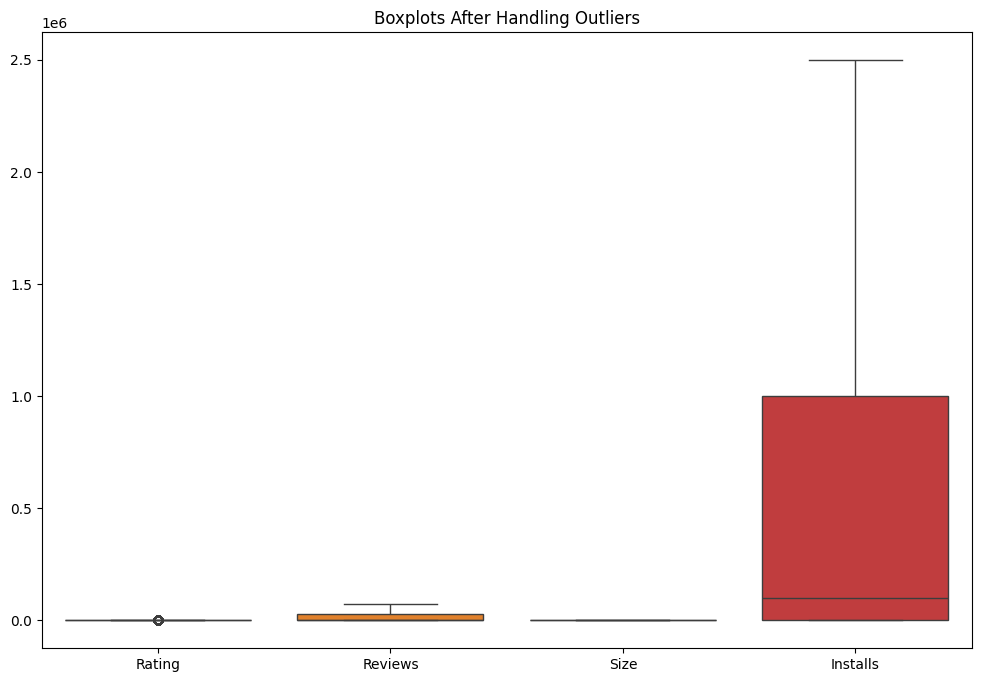

In [52]:
# Check summary statistics for numerical columns
print(data[['Rating', 'Reviews', 'Size', 'Installs']].describe())

# Visualize the columns using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Rating', 'Reviews', 'Size', 'Installs']])
plt.title('Boxplots After Handling Outliers')
plt.show()

            Reviews         Size      Installs
count   9659.000000  9659.000000  9.659000e+03
mean   18675.446087    18.951974  7.005958e+05
std    28379.076900    16.042631  9.749845e+05
min        0.000000     0.008301  0.000000e+00
25%       25.000000     5.300000  1.000000e+03
50%      969.000000    16.000000  1.000000e+05
75%    29453.500000    25.000000  1.000000e+06
max    73596.250000    54.550000  2.498500e+06


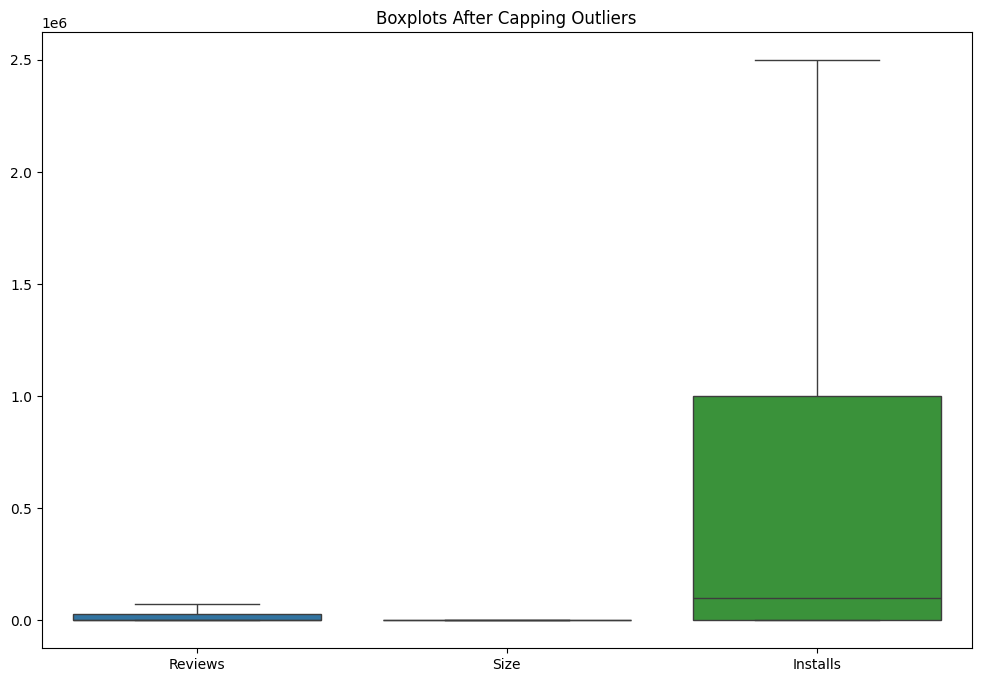

In [53]:
# Cap Reviews at the 95th percentile
review_cap = data['Reviews'].quantile(0.95)
data['Reviews'] = data['Reviews'].clip(upper=review_cap)

# Cap Size at the 95th percentile
size_cap = data['Size'].quantile(0.95)
data['Size'] = data['Size'].clip(upper=size_cap)

# Cap Installs at the 95th percentile
install_cap = data['Installs'].quantile(0.95)
data['Installs'] = data['Installs'].clip(upper=install_cap)

# Recheck summary statistics
print(data[['Reviews', 'Size', 'Installs']].describe())

# Replot boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Reviews', 'Size', 'Installs']])
plt.title('Boxplots After Capping Outliers')
plt.show()

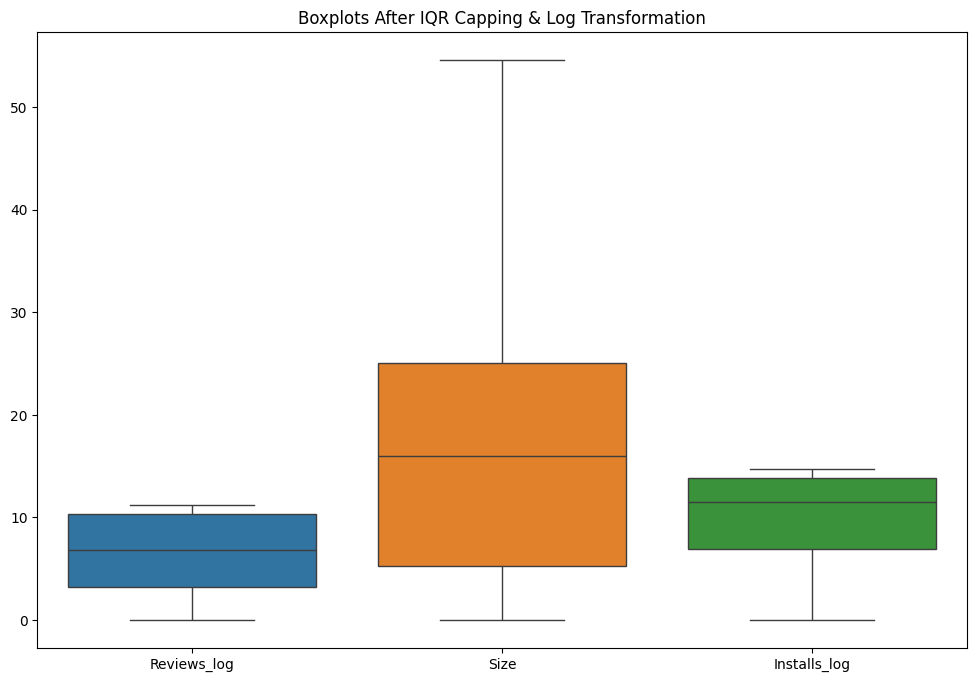

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the first and third quartiles
Q1 = data[['Reviews', 'Size', 'Installs']].quantile(0.25)
Q3 = data[['Reviews', 'Size', 'Installs']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply IQR capping to remove extreme outliers
data[['Reviews', 'Size', 'Installs']] = data[['Reviews', 'Size', 'Installs']].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Apply Log Transformation to normalize the data
data['Installs_log'] = np.log1p(data['Installs'])
data['Reviews_log'] = np.log1p(data['Reviews'])

# Plot the transformed data using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Reviews_log', 'Size', 'Installs_log']])
plt.title('Boxplots After IQR Capping & Log Transformation')
plt.show()


### **Data Analysis & Visualizations**  



C:\Users\shher\AppData\Local\Temp\ipykernel_26660\2838874087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Installs", data=data, palette=palette)
C:\Users\shher\AppData\Local\Temp\ipykernel_26660\2838874087.py:3: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="Installs", data=data, palette=palette)


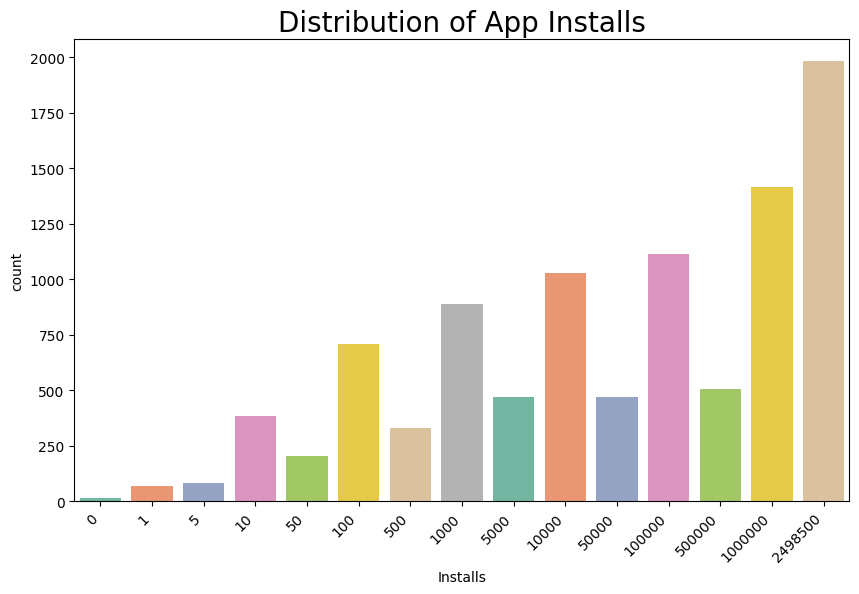

In [55]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2")
sns.countplot(x="Installs", data=data, palette=palette)
plt.title("Distribution of App Installs", fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\shher\AppData\Local\Temp\ipykernel_26660\2680520247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


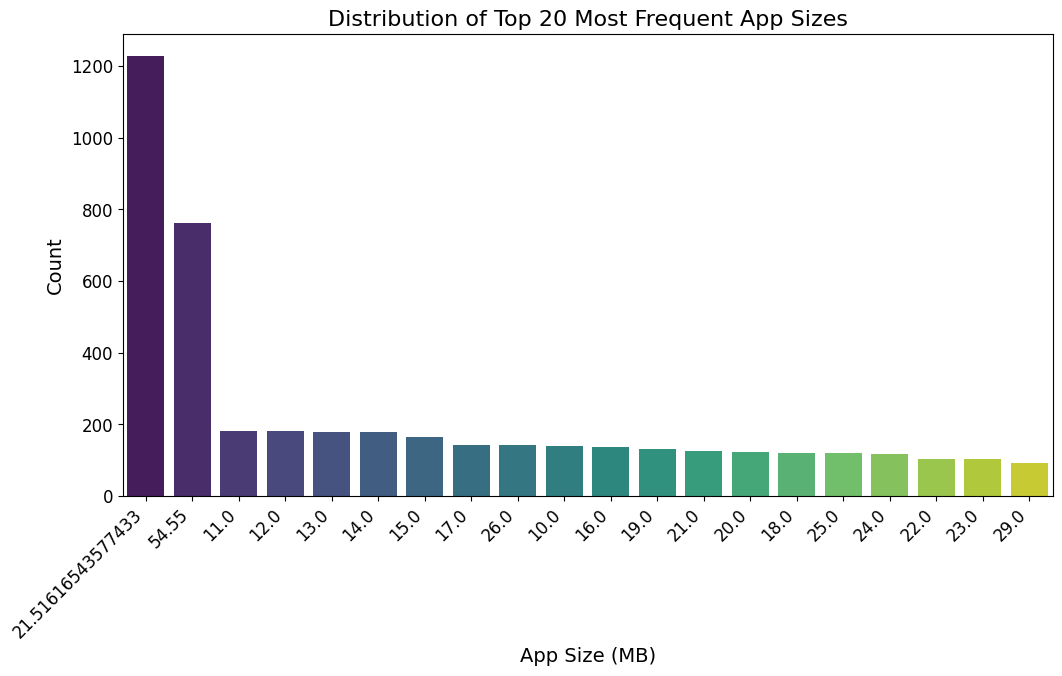

In [56]:

top_sizes = data["Size"].value_counts().nlargest(20).index

plt.figure(figsize=(12, 6))
palette = sns.color_palette("viridis", len(top_sizes))

sns.countplot(
    x="Size",
    data=data[data["Size"].isin(top_sizes)],
    order=top_sizes,  
    palette=palette
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("App Size (MB)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Top 20 Most Frequent App Sizes", fontsize=16)

plt.show()


C:\Users\shher\AppData\Local\Temp\ipykernel_26660\1980971899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Category'], order=data['Category'].value_counts().index, palette='viridis')


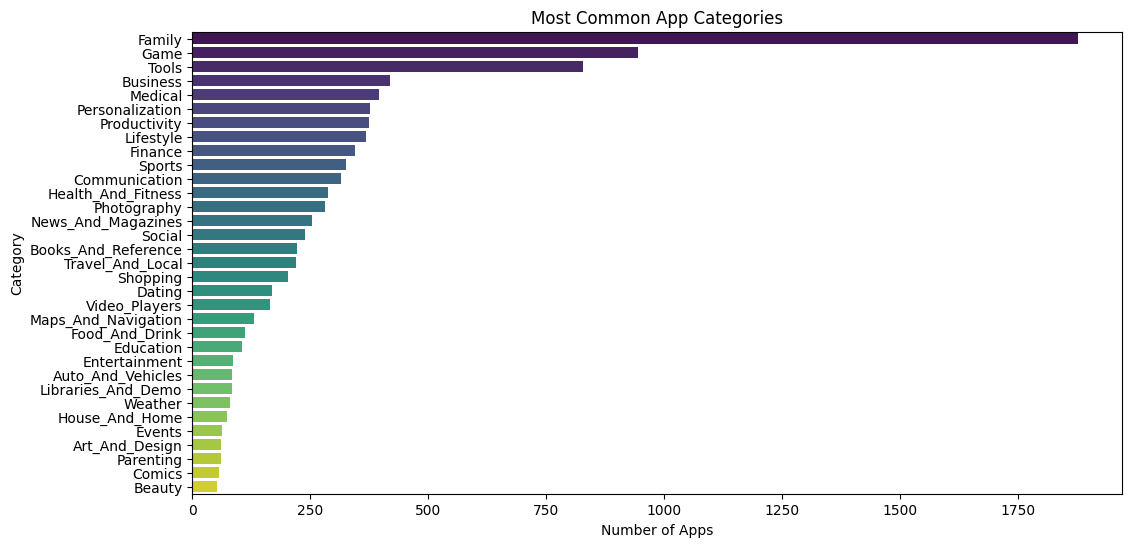

In [57]:
#  Most Common Categories (Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(y=data['Category'], order=data['Category'].value_counts().index, palette='viridis')
plt.title('Most Common App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


C:\Users\shher\AppData\Local\Temp\ipykernel_26660\1455071561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_avg_rating.index, x=category_avg_rating.values, palette='coolwarm')


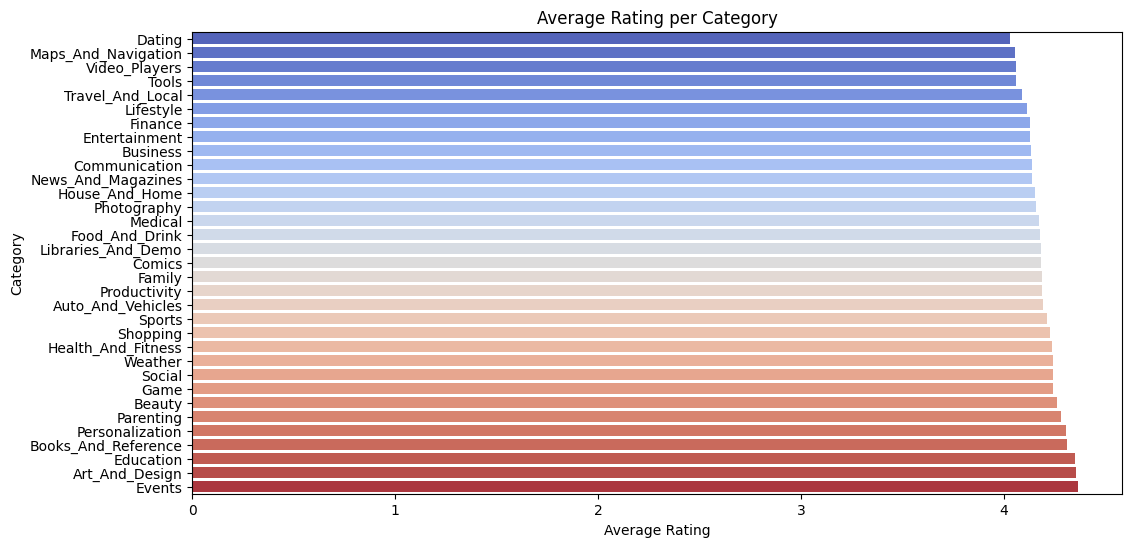

In [58]:
#  Average Rating per Category (Bar Chart)
plt.figure(figsize=(12, 6))
category_avg_rating = data.groupby('Category')['Rating'].mean().sort_values()
sns.barplot(y=category_avg_rating.index, x=category_avg_rating.values, palette='coolwarm')
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


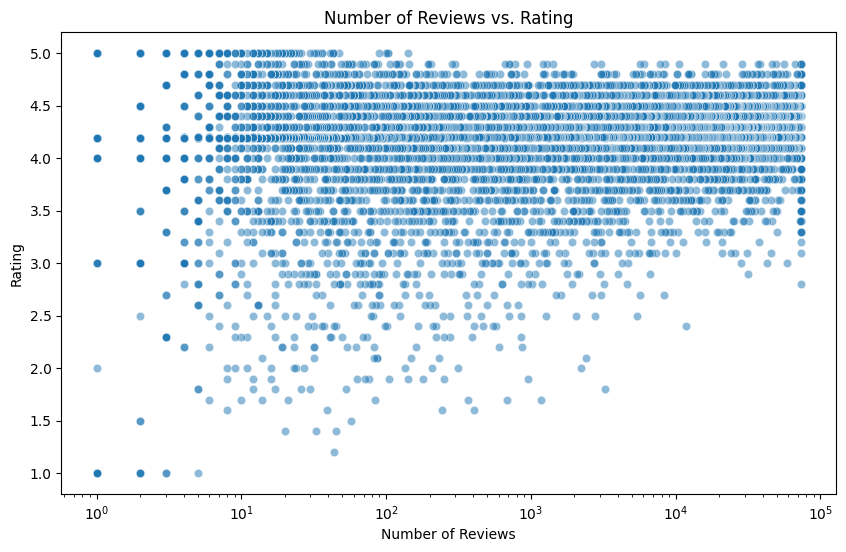

In [59]:
# Reviews vs. Rating (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Reviews'], y=data['Rating'], alpha=0.5)
plt.xscale('log')
plt.title('Number of Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()


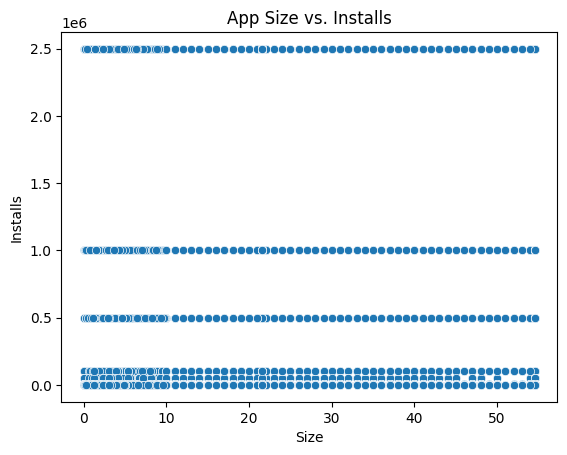

In [60]:
#Analyze Size vs. Installs
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Size vs. Installs
sns.scatterplot(x='Size', y='Installs', data=data)
plt.title('App Size vs. Installs')
plt.show()

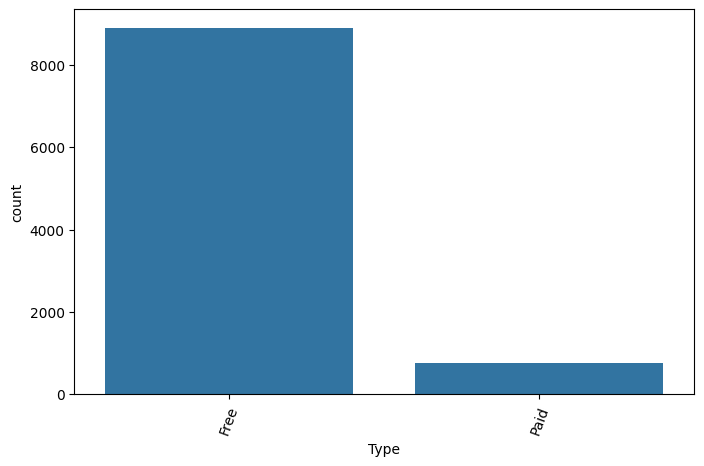

In [61]:
# free vs paid
plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(x='Type', data=data)
plt.xticks(rotation=70)
plt.show()

<Axes: ylabel='count'>

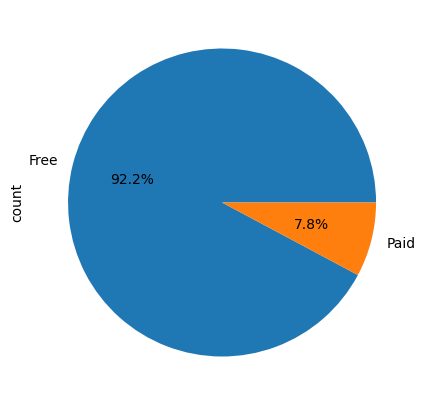

In [62]:
data["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

C:\Users\shher\AppData\Local\Temp\ipykernel_26660\2421625414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Genres", data=data[data["Genres"].isin(top_categories.index)], palette=palette)
C:\Users\shher\AppData\Local\Temp\ipykernel_26660\2421625414.py:5: UserWarning: 
The palette list has fewer values (8) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="Genres", data=data[data["Genres"].isin(top_categories.index)], palette=palette)


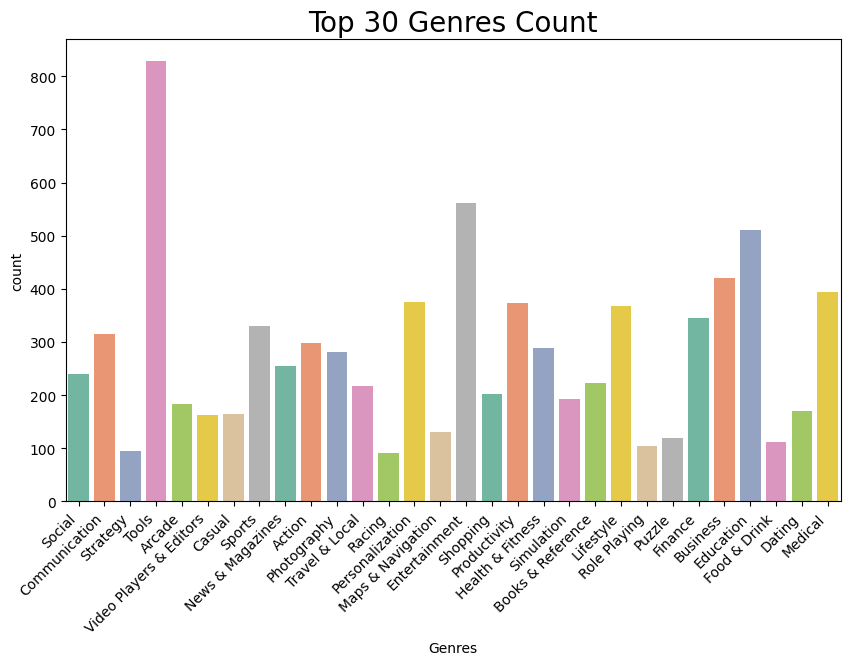

In [63]:
category_counts = data["Genres"].value_counts()
top_categories = category_counts.head(30)
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2")
sns.countplot(x="Genres", data=data[data["Genres"].isin(top_categories.index)], palette=palette)
plt.xticks(rotation=45, ha="right")
plt.title("Top 30 Genres Count", fontsize=20)
plt.show()

In [64]:
# Find the genre with the highest number of apps
top_genre = data['Genres'].value_counts().idxmax()
genre_count = data['Genres'].value_counts().max()

print(f"The most popular genre is: {top_genre} with {genre_count} apps")


The most popular genre is: Tools with 828 apps


In [65]:
data.sort_values("Price",ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Installs_log,Reviews_log
4367,I'm Rich - Trump Edition,Lifestyle,3.600000,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",4.1,9.210440,5.620401
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,Lifestyle,4.193338,0.0,40.0,0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",4.1,0.000000,0.000000
5351,I am rich,Lifestyle,3.800000,3547.0,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",4.0,11.512935,8.174139
4362,💎 I'm rich,Lifestyle,3.800000,718.0,26.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",4.4,9.210440,6.577861
5354,I am Rich Plus,Family,4.000000,856.0,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",4.4,9.210440,6.753438


In [66]:
most_expensive_app = data.sort_values(by="Price", ascending=False).head(1)
print(most_expensive_app)

                           App   Category  Rating  Reviews  Size  Installs  \
4367  I'm Rich - Trump Edition  Lifestyle     3.6    275.0   7.3     10000   

      Type  Price Content Rating     Genres Last Updated  Android Ver  \
4367  Paid  400.0       Everyone  Lifestyle  May 3, 2018          4.1   

      Installs_log  Reviews_log  
4367       9.21044     5.620401  


In [67]:
# 7. Apps with rating higher than 4.7 and their average price
high_rating_apps = data[data['Rating'] > 4.7]
high_rating_avg_price = high_rating_apps['Price'].mean()
print("Number of apps with rating > 4.7:", high_rating_apps.shape[0])
print("Average price of these apps:", high_rating_avg_price)


Number of apps with rating > 4.7: 576
Average price of these apps: 0.46289930555555553


In [68]:
# Estimated Google Revenue from Paid Apps (5M+ Installs)
high_installs = data[data['Installs'] >= 5000000]
google_cut = (high_installs['Price'] * 0.30).sum()
print(f"Estimated Google Revenue from Paid Apps (5M+ Installs): ${google_cut:,.2f}")


Estimated Google Revenue from Paid Apps (5M+ Installs): $0.00


In [69]:
# 9. Max & Min size of free vs. paid apps
size_stats = data.groupby('Type')['Size'].agg(['max', 'min'])
print("Max & Min Size of Free vs Paid Apps:\n", size_stats)


Max & Min Size of Free vs Paid Apps:
         max       min
Type                 
Free  54.55  0.008301
Paid  54.55  0.013672


In [70]:
data.sort_values(by="Reviews", ascending=False).head(66)[["App", "Reviews"]]


,App,Reviews
2544,Facebook,73596.25
5228,Tunnel Town,73596.25
1904,Fruits Bomb,73596.25
5033,ActionDirector Video Editor - Edit Videos Fast,73596.25
8292,Your Freedom VPN Client,73596.25
...,...,...
4037,Fruit Ninja®,73596.25
4044,Dr. Driving,73596.25
3348,Applock,73596.25
5077,AppLock,73596.25


In [71]:
data["Reviews"] = data["Reviews"].astype(int)


In [72]:
#Calculate Average Size
average_size = data['Size'].mean()
print(f"Average app size: {average_size:.2f} MB")

Average app size: 18.95 MB


In [73]:
#Compare Sizes of Free vs. Paid Apps
average_size_by_type = data.groupby('Type')['Size'].mean()
print(average_size_by_type)

Type
Free    19.057195
Paid    17.709276
Name: Size, dtype: float64


C:\Users\shher\AppData\Local\Temp\ipykernel_26660\3709287248.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[most_common_category], y=[most_common_count], palette='viridis')


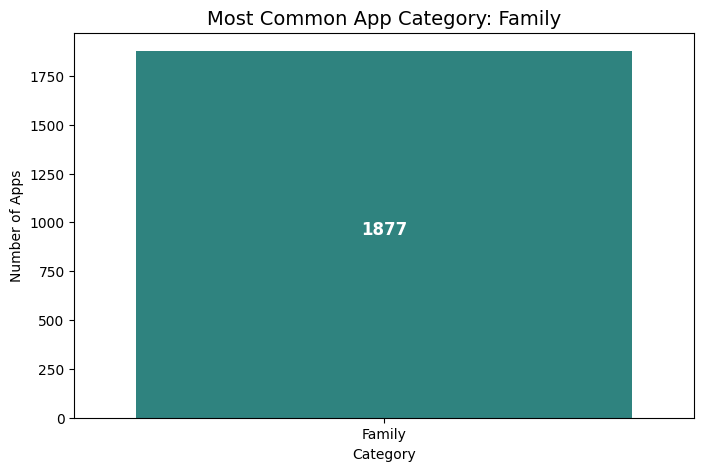

In [74]:
# Get the most common category and its count
most_common_category = data['Category'].value_counts().idxmax()
most_common_count = data['Category'].value_counts().max()

# Plot the category count
plt.figure(figsize=(8, 5))
sns.barplot(x=[most_common_category], y=[most_common_count], palette='viridis')

# Add title and labels
plt.title(f"Most Common App Category: {most_common_category}", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Number of Apps")

# Display the count on the bar
plt.text(0, most_common_count / 2, f"{most_common_count}", ha='center', fontsize=12, color='white', weight='bold')

# Show the plot
plt.show()


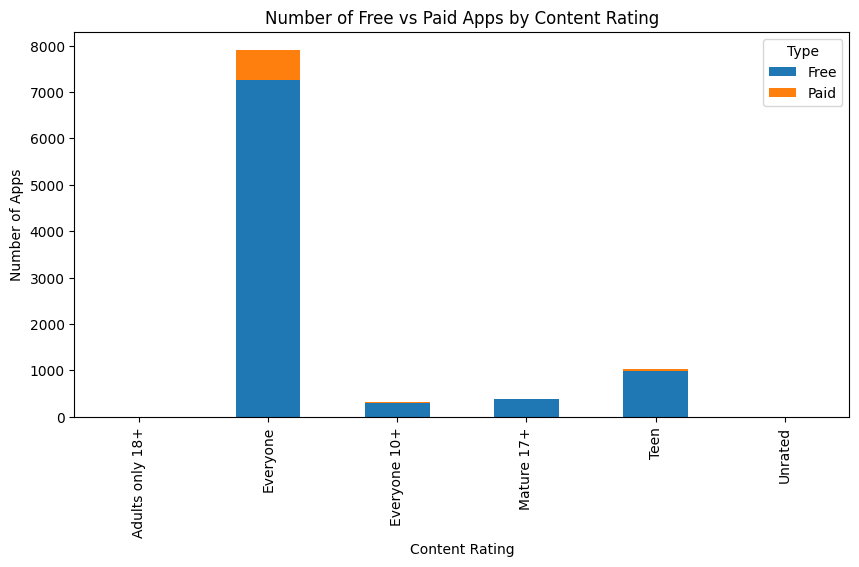

In [75]:
# 11. Number of apps for each type across different content ratings
type_content_rating = data.groupby(['Content Rating', 'Type']).size().unstack()
type_content_rating.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Number of Free vs Paid Apps by Content Rating")
plt.ylabel("Number of Apps")
plt.show()

<Axes: xlabel='App', ylabel='Rating'>

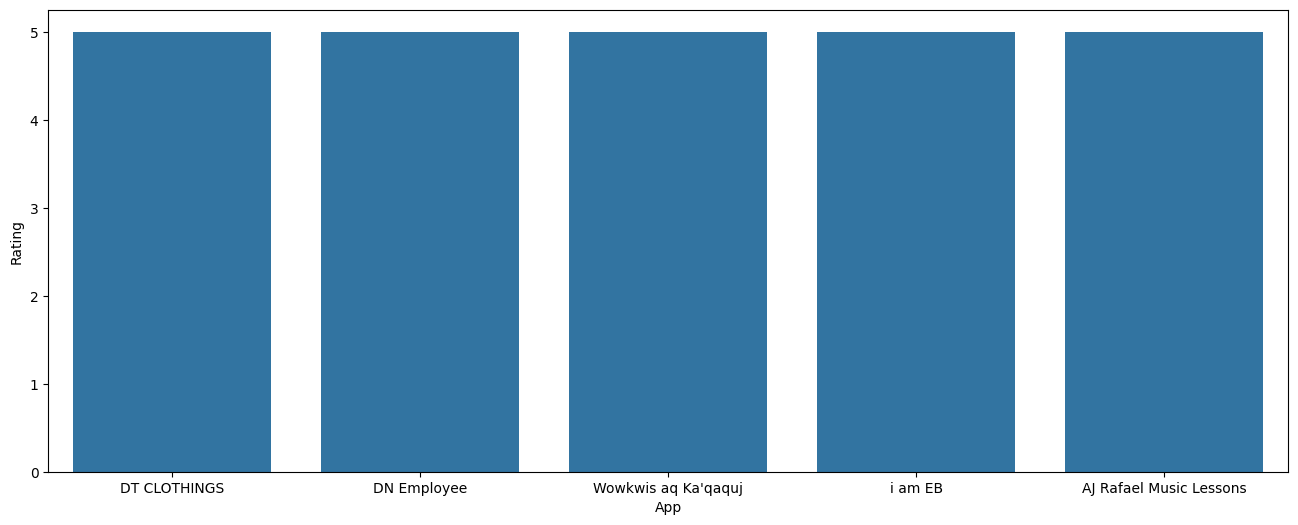

In [76]:
# plot top 5 rated free apps
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Rating',data=data[data['Type']=='Free'].sort_values(by='Rating',ascending=False).head(5))

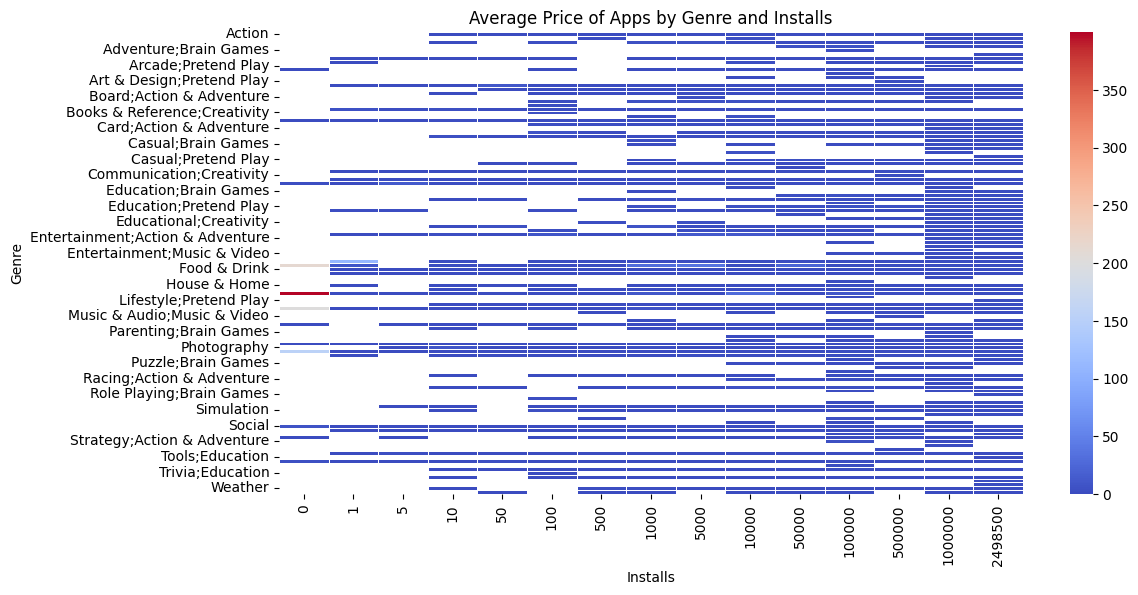

In [77]:
# 6. Average price grouped by genre and installs
avg_price_genre_installs = data.groupby(['Genres', 'Installs'])['Price'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(avg_price_genre_installs, cmap='coolwarm', linewidths=0.5)
plt.title("Average Price of Apps by Genre and Installs")
plt.xlabel("Installs")
plt.ylabel("Genre")
plt.show()

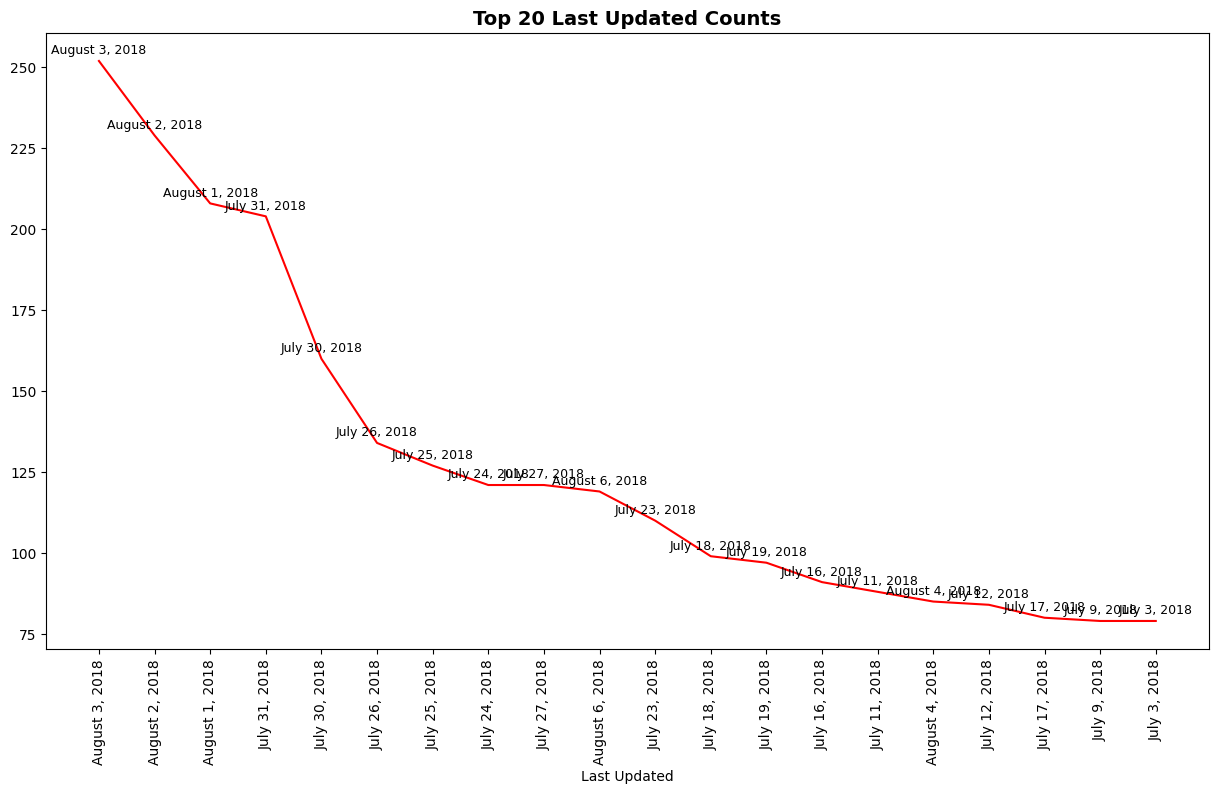

In [78]:
plt.figure(figsize=(15, 8))

sns.lineplot(x=data['Last Updated'].value_counts().head(20).index,
             y=data['Last Updated'].value_counts().head(20).values,
             alpha=1, color="r")

for i, txt in enumerate(data['Last Updated'].value_counts().head(20).index):
    plt.annotate(txt, (data['Last Updated'].value_counts().head(20).index[i],
                       data['Last Updated'].value_counts().head(20).values[i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)
plt.xticks(rotation=90)
plt.title('Top 20 Last Updated Counts', fontsize=14, fontweight='heavy')
plt.show()

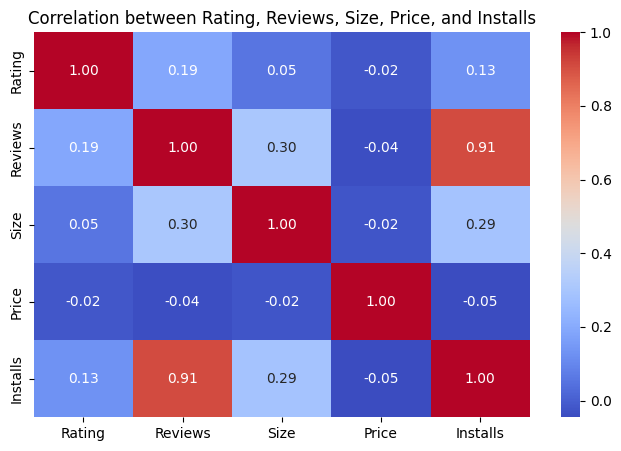

In [89]:
correlation_matrix = data[['Rating', 'Reviews', 'Size', 'Price', 'Installs']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Rating, Reviews, Size, Price, and Installs')
plt.show()

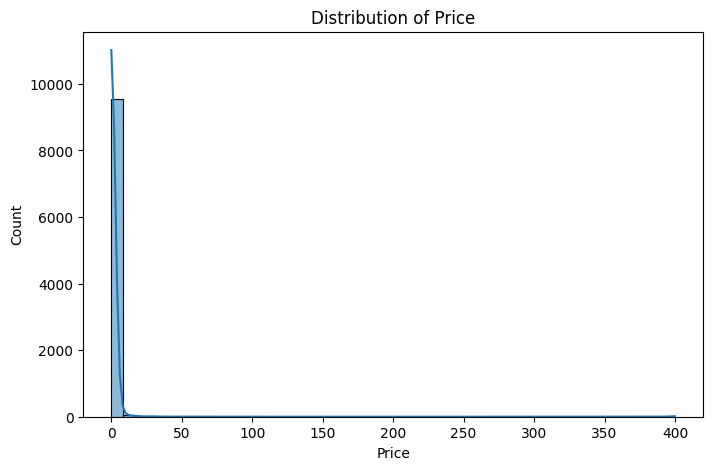

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Price'], bins=50, kde=True)
plt.title("Distribution of Price")
plt.show()


### **Key Insights from Google Play Store Analysis**  

🔹 **Diverse App Categories:**  
Google Play Store hosts a vast range of app categories, with gaming, family, and productivity apps leading in numbers.  

🔹 **User Satisfaction:**  
A majority of apps maintain high user ratings, reflecting positive feedback and overall satisfaction.  

🔹 **High Installation Numbers:**  
Many apps have surpassed the **1M+ install mark**, showcasing their popularity among global users.  

🔹 **Frequent Updates:**  
A pattern of regular updates, especially in 2018, suggests that developers are actively improving their apps.  

🔹 **Prevalence of Free Apps:**  
Most apps on the Play Store are free, indicating a strong reliance on ad revenue and in-app purchases.  

🔹 **Broad Android Compatibility:**  
Developers aim for inclusivity by supporting multiple Android versions, ensuring a larger user base.  

🔹 **Strong User Engagement:**  
The combination of **high ratings and frequent downloads** highlights strong user interaction with popular applications.  

🚀 **Overall, Google Play Store is a thriving marketplace with diverse apps, user-focused experiences, and continuous innovation.**